Probability practice
Part A. Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65% said Yes and 35% said No. What fraction of people who are truthful clickers answered yes? Hint: use the rule of total probability.

In [1]:
#Known Variables
prob_RC = 0.3
prob_TC = 1 - prob_RC
prob_yes = .65
prob_no = .35
prob_yes_givenRC = 0.5
prob_no_givenRC = 1 - prob_yes_givenRC

# Using the rule of total probability, we can find the fraction of truthful clickers who answered "Yes"
# p(Yes) = p(Yes|RC) * p(RC) + p(Yes|TC) * p(TC)
# .65 = .5 * .3 + ??? * .7
prob_yes_givenTC = (prob_yes - prob_yes_givenRC * prob_RC) / prob_TC

print("The Fraction of People who are Truthful Clickers that answered Yes: ", prob_yes_givenTC)

The Fraction of People who are Truthful Clickers that answered Yes:  0.7142857142857143


Part B. Imagine a medical test for a disease with the following two attributes:

The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.
The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.
In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).
Suppose someone tests positive. What is the probability that they have the disease?

In [35]:
#Known Variables
prob_disease = 0.000025
prob_no_disease = 1 - prob_disease
prob_positive_given_disease = 0.993
prob_negative_given_no_disease = 0.9999
prob_positive_given_no_disease = 1 - prob_negative_given_no_disease 
prob_negative_given_disease = 1 - prob_positive_given_disease

#Bayes Theorem: Calculating an Event given that another event has happened
#Calculating the probability of having a disease given that the test was positive
prob_positive = (prob_positive_given_disease * prob_disease) + (prob_positive_given_no_disease * prob_no_disease)
prob_disease_given_positive = (prob_positive_given_disease * prob_disease) / prob_positive

print("Probability of having the disease given a positive test result: ", prob_disease_given_positive)

Probability of having the disease given a positive test result:  0.19888241302651516


Wrangling the Billboard Top 100
Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

performer: who performed the song
song: the title of the song
year: year (1958 to 2021)
week: chart week of that year (1, 2, etc)
week_position: what position that song occupied that week on the Billboard top 100 chart.
Use your skills in data wrangling and plotting to answer the following three questions.

Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [7]:
billboard = pd.read_csv("billboard.csv")

#creates a dataframe grouped by performers and song combinations, and provides a count of the weeks it was on the 
top_songs = billboard.groupby(['performer',"song"])["week"].count().reset_index()
#sorts from most weeks to least and pulls the Top 10
top_songs = top_songs.sort_values(by = "week", ascending = False).head(10)
top_songs = top_songs.rename(columns = {"week": "count"})
print(top_songs.to_string(index=False))

FileNotFoundError: [Errno 2] No such file or directory: 'billboard.csv'

Part B: Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

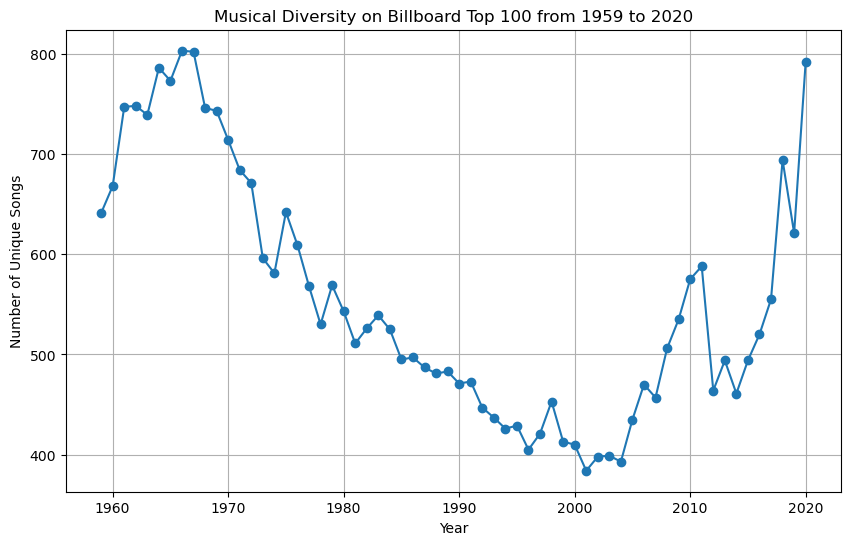

In [7]:
#Filtering out years 1958 and 2021
filtered_year_data = billboard[(billboard["year"] != 1958) & (billboard["year"] != 2021)]
#Groups the data by year and gives count of number of unique songs
musical_diversity = filtered_year_data.groupby("year")["song"].nunique().reset_index()

#Creates Line graph
plt.figure(figsize=(10,6))
plt.plot(musical_diversity["year"], musical_diversity["song"], marker = "o")
plt.xlabel("Year")
plt.ylabel("Number of Unique Songs")
plt.title("Musical Diversity on Billboard Top 100 from 1959 to 2020")
plt.grid(True)
plt.show()

Part C: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

You might find this easier to accomplish in two distinct sets of data wrangling steps.
Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
#By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

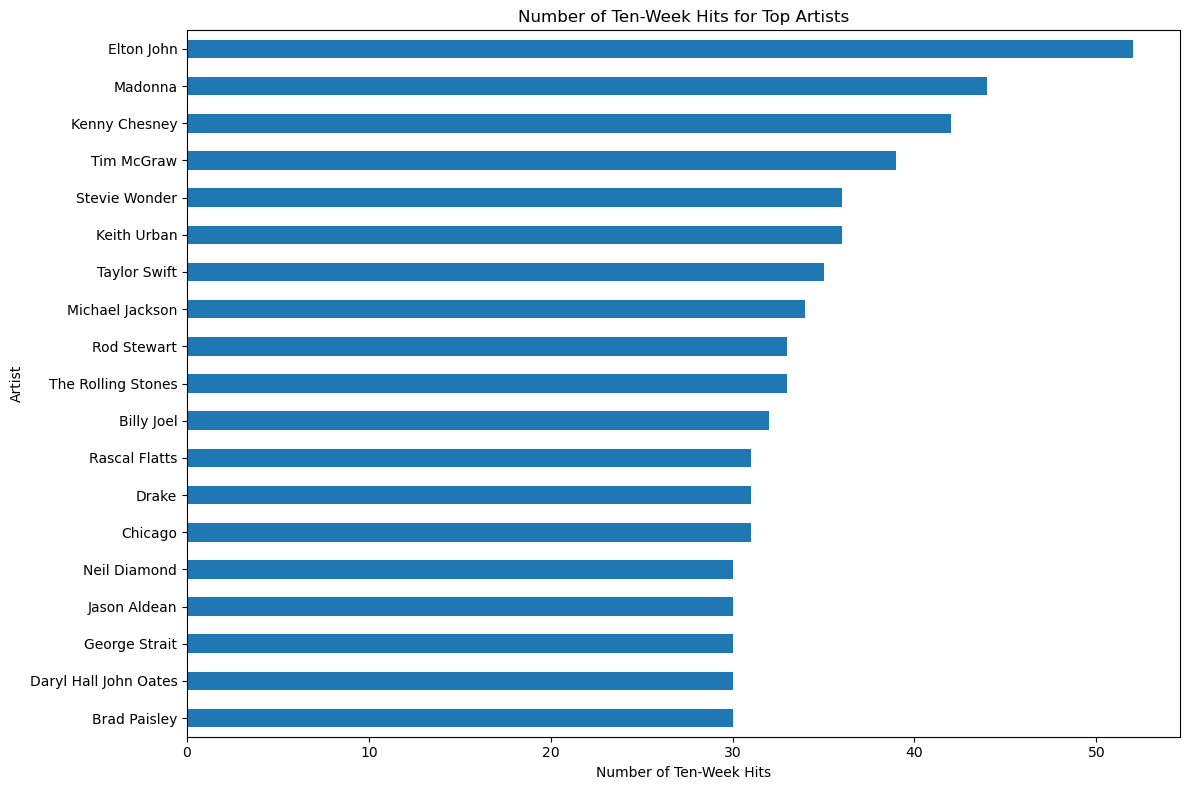

In [33]:
#Counts the number of weeks a song appears on the Billboard for each artist
artist_weeks_on_chart = billboard.groupby(["performer", "song"])["week"].nunique()
#Counts number of songs that were ten week hits
artist10weeks = artist_weeks_on_chart[artist_weeks_on_chart >= 10]
#Count the number of ten week hits for each artists
artist10weeks = artist10weeks.groupby("performer").count()
#Filters to artists with at least 30 ten week hits
artist30hits = artist10weeks[artist10weeks >= 30]
#artist30hits.count()

#Creating Bar Plot
plt.figure(figsize = (12, 8))
#Making the bar plot horizontal to ensure that the arists names are readable
artist30hits.sort_values().plot(kind = "barh")
plt.xlabel("Number of Ten-Week Hits")
plt.ylabel("Artist")
plt.title("Number of Ten-Week Hits for Top Artists")
plt.tight_layout()
plt.show()

Visual story telling part 1: green buildings

The goal

An Austin real-estate developer is interested in the possible economic impact of "going green" in her latest project: a new 15-story mixed-use building on East Cesar Chavez, just across I-35 from downtown. Will investing in a green building be worth it, from an economic perspective? The baseline construction costs are $100 million, with a 5% expected premium for green certification.

The developer has had someone on her staff, who's been described to her as a "total Excel guru from his undergrad statistics course," run some numbers on this data set and make a preliminary recommendation. Here's how this person described his process.

I began by cleaning the data a little bit. In particular, I noticed that a handful of the buildings in the data set had very low occupancy rates (less than 10% of available space occupied). I decided to remove these buildings from consideration, on the theory that these buildings might have something weird going on with them, and could potentially distort the analysis. Once I scrubbed these low-occupancy buildings from the data set, I looked at the green buildings and non-green buildings separately. The median market rent in the non-green buildings was $25 per square foot per year, while the median market rent in the green buildings was $27.60 per square foot per year: about $2.60 more per square foot. (I used the median rather than the mean, because there were still some outliers in the data, and the median is a lot more robust to outliers.) Because our building would be 250,000 square feet, this would translate into an additional $250000 x 2.6 = $650000 of extra revenue per year if we build the green building.

Our expected baseline construction costs are $100 million, with a 5% expected premium for green certification. Thus we should expect to spend an extra $5 million on the green building. Based on the extra revenue we would make, we would recuperate these costs in $5000000/650000 = 7.7 years. Even if our occupancy rate were only 90%, we would still recuperate the costs in a little over 8 years. Thus from year 9 onwards, we would be making an extra $650,000 per year in profit. Since the building will be earning rents for 30 years or more, it seems like a good financial move to build the green building.

The developer listened to this recommendation, understood the analysis, and still felt unconvinced. She has therefore asked you to revisit the report, so that she can get a second opinion.

Do you agree with the conclusions of her on-staff stats guru? If so, point to evidence supporting his case. If not, explain specifically where and why the analysis goes wrong, and how it can be improved. Do you see the possibility of confounding variables for the relationship between rent and green status? If so, provide evidence for confounding, and see if you can also make a picture that visually shows how we might "adjust" for such a confounder. Tell your story in pictures, with appropriate introductory and supporting text.

Note: this is intended as an exercise in visual and numerical story-telling. Your approach should rely on pictures and/or tables, not a regression model. Tell a story understandable to a non-technical audience. Keep it concise.

Visual story telling part 2: Capital Metro data

The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

timestamp: the beginning of the 15-minute window for that row of data
boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
temperature: temperature at that time in degrees F
hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
month: July through December
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Davis\AppData\Local\Temp\ipykernel_8224\2874785454.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=capmetro, x="day_of_week", y="net_passenger", ci= None)


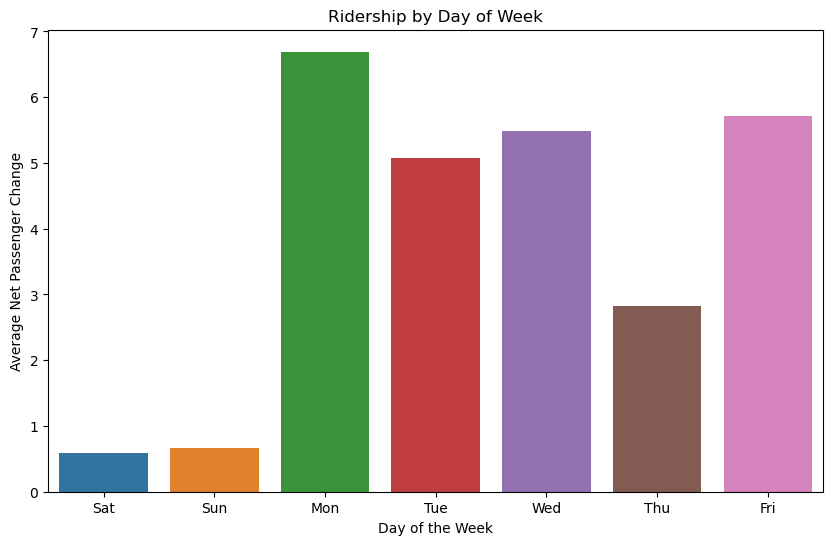

In [27]:
capmetro = pd.read_csv("capmetro_UT.csv")
##Data Preparation
capmetro["net_passenger"] = capmetro["boarding"] - capmetro["alighting"]

#Ridership by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(data=capmetro, x="day_of_week", y="net_passenger", ci= None)
plt.title("Ridership by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Net Passenger Change")
plt.show()

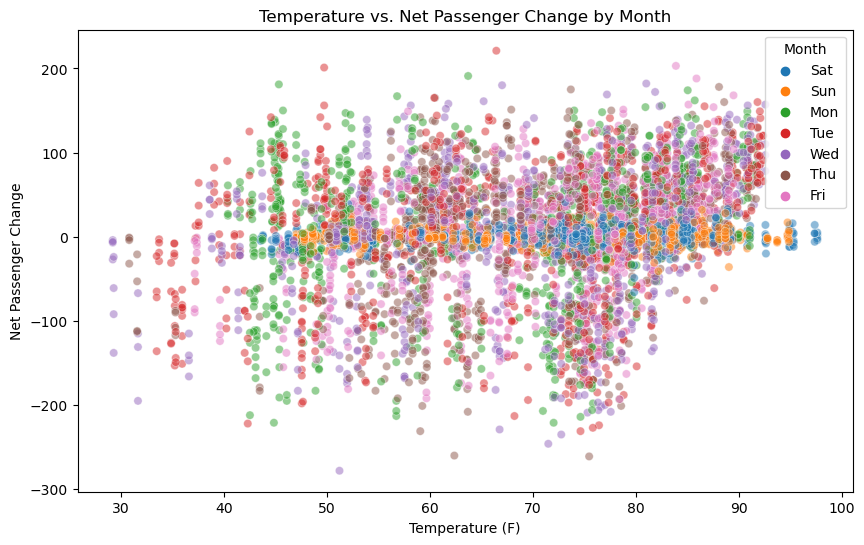

In [29]:
# Temperature vs. Ridership by Month
plt.figure(figsize=(10, 6))
sns.scatterplot(data=capmetro, x='temperature', y='net_passenger', hue='day_of_week', alpha=0.5)
plt.title('Temperature vs. Net Passenger Change by Month')
plt.xlabel('Temperature (F)')
plt.ylabel('Net Passenger Change')
plt.legend(title='Month')
plt.show()

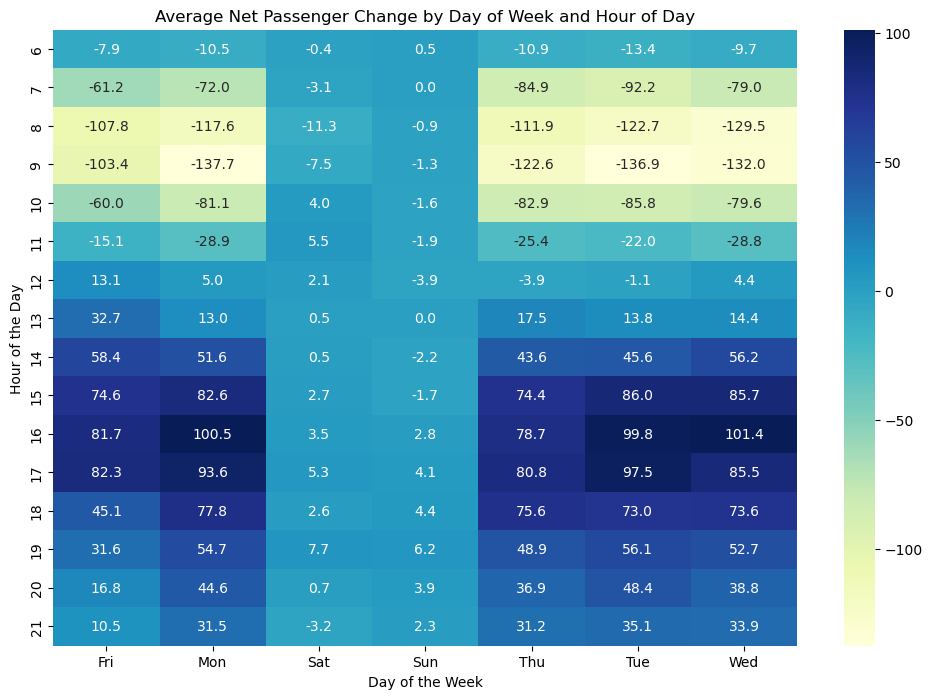

In [28]:
# Pivot the data to create a matrix for the heatmap
pivot_data = capmetro.pivot_table(index="hour_of_day", columns="day_of_week", values="net_passenger", aggfunc="mean")

# Plot the heatmap
#Having trouble having the x axis list the days of the week in order. Attempts have fixed the labels on the x axis but not the data in the columns
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Average Net Passenger Change by Day of Week and Hour of Day")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()
#Heat Map shows that peak net ridership hours are Hours 15-17, M-F with it dropping off as you progress through the week

<Figure size 1000x600 with 0 Axes>

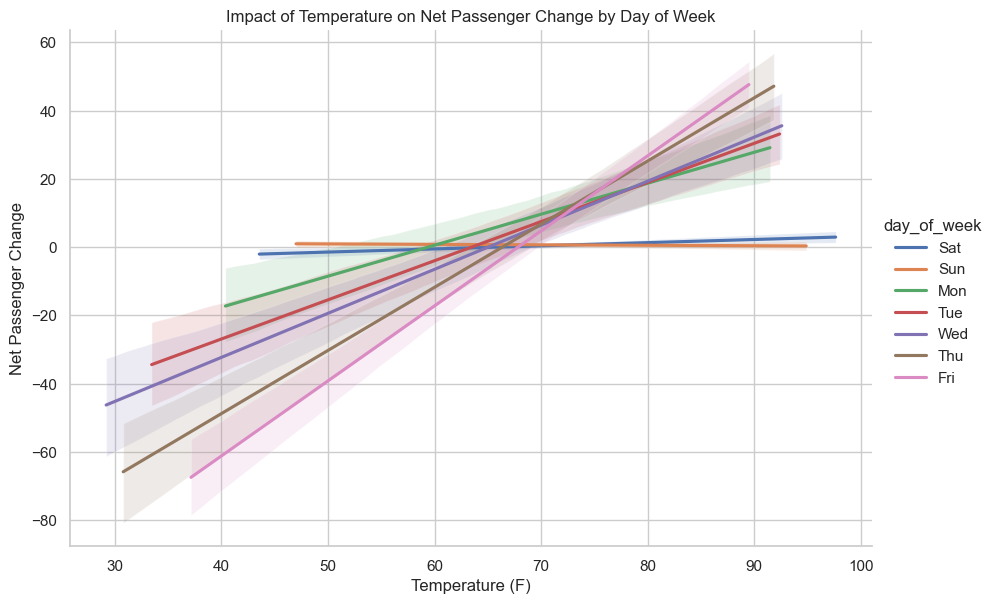

In [50]:
# Create a line plot with trendlines only and hue differentiation based on hour of day
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Remove background color
g = sns.lmplot(data=capmetro, x='temperature', y='net_passenger', hue='day_of_week', scatter=False, height=6, aspect=1.5)
g.set_axis_labels("Temperature (F)", "Net Passenger Change")
plt.title('Impact of Temperature on Net Passenger Change by Day of Week')
plt.show()
#This plot shows that days with cold temperatures have lower net ridership than days with higher heats. Likely related to colder days being less frequent and having a larger impact on city infrastructure and day to day business.

Market segmentation

Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
social = pd.read_csv("social_marketing.csv")

#Select columns representing interests (excluding user_id)
interest_columns = social.columns[1:]

#Standardize the Data (ensures that each feature contributes equally to the analysis, important when using distances or similarities)
scaler = StandardScaler()
social_scaled = scaler.fit_transform(social[interest_columns])

#Perform KMeans Clustering
num_clusters = 6    #Mess around with different variables here
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
social["cluster"] = kmeans.fit_predict(social_scaled)

#Group data by cluster and calculate mean interests
cluster_means = social.groupby("cluster")[interest_columns].mean()

#Generate Report
report = "Market Segmentation Analysis for NutrientH20:\n\n"
for cluster_id in range(num_clusters):
    report += f"Cluster {cluster_id + 1}:\n" #Cluster Number
    cluster_interests = cluster_means.loc[cluster_id] #Retrieves mean interests from cluster_means, giving a series containing mean for each column
    top_interests = cluster_interests.sort_values(ascending=False)[:3] #Pulls Top 3 Interests
    report += f"Top Interests: {', '.join(top_interests.index)}\n\n" #Appends Top 3 to report
print(report)

C:\Users\Davis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Market Segmentation Analysis for NutrientH20:

Cluster 1:
Top Interests: health_nutrition, personal_fitness, chatter

Cluster 2:
Top Interests: college_uni, online_gaming, chatter

Cluster 3:
Top Interests: cooking, photo_sharing, fashion

Cluster 4:
Top Interests: politics, travel, news

Cluster 5:
Top Interests: sports_fandom, religion, food

Cluster 6:
Top Interests: chatter, photo_sharing, current_events




Analysis (May need to do additional Segmentation. So Far have only done clustering, could look for correlated interests or latent factors)

According to our clustering of NutrientH20's twitter's following, there are the predictable clusters you'd imagine from a company called NutrientH20, such as health/fitness fans and cooking photo takers. However, there are interesting intersections with college gamers, traveling politics speakers, and religious sports fans. This could be the result of effective advertising by NutrientH20 where they were able to land an audience in these spheres of influence. Either way, further targeted advertisements and promotions would be a good way to solidify their influence in these tangential audiences.

Association rule mining

Revisit the notes on association rule mining and the R example on music playlists: playlists.R and playlists.csv. Then use the data on grocery purchases in groceries.txt and find some interesting association rules for these shopping baskets. The data file is a list of shopping baskets: one person's basket for each row, with multiple items per row separated by commas. Pick your own thresholds for lift and confidence; just be clear what these thresholds are and say why you picked them. Do your discovered item sets make sense? Present your discoveries in an interesting and visually appealing way.

Notes:

This is an exercise in visual and numerical story-telling. Do be clear in your description of what you've done, but keep the focus on the data, the figures, and the insights your analysis has drawn from the data, rather than technical details.
The data file is a list of baskets: one row per basket, with multiple items per row separated by commas. You'll have to cobble together your own code for processing this into the format expected by the "arules" package. This is not intrinsically all that hard, but it is the kind of data-wrangling wrinkle you'll encounter frequently on real problems, where your software package expects data in one format and the data comes in a different format. Figuring out how to bridge that gap is part of the assignment, and so we won't be giving tips on this front.

In [14]:
#mlxtend library utilized for association rule mining
from efficient_apriori import apriori
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Step 1: Read in groceries.txt and perform data preprocessing
groceries = []
with open("groceries.txt", "r") as f:
    groceries = [line.strip().split(",") for line in f]

# Display the list of transactions (Checks to see if the data was read in correctly)
#for cart in groceries:
#    print(cart)

#Step 2: Perform Association Rule Mining
#Find frequent item sets using Apriori algorithm
#Can mess around with min support and min confidence, answer is written for supp = .03 and confidence = .4
#### Feel free to search for better Support and Confidence, this was what I went with just to see if the code worked
itemsets, rules = apriori(groceries, min_support = 0.03, min_confidence = 0.4)

#Step 3: Display Results
#Not sure if this section is meant to list items beneath it. Might delete from final submission. Messing around with the support
#creates additional numbers underneath, but not sure what they are meant to represent.
print("Frequency Itemsets")
for itemset in itemsets:
    print(itemset)

#Important Section of the Output. Look at Writeup Below that explains what the conf, supp, and lift mean
print("\nAssociation Rules:")
for rule in rules:
    print(rule)

Frequency Itemsets
1
2

Association Rules:
{root vegetables} -> {other vegetables} (conf: 0.435, supp: 0.047, lift: 2.247, conv: 1.427)
{root vegetables} -> {whole milk} (conf: 0.449, supp: 0.049, lift: 1.756, conv: 1.350)
{tropical fruit} -> {whole milk} (conf: 0.403, supp: 0.042, lift: 1.578, conv: 1.247)
{whipped/sour cream} -> {whole milk} (conf: 0.450, supp: 0.032, lift: 1.760, conv: 1.353)
{yogurt} -> {whole milk} (conf: 0.402, supp: 0.056, lift: 1.572, conv: 1.244)


Analysis

From the Association Rules Output, we see several relationships of note. For example, Root Vegetables has a confidence of .435 in relationship with other vegetables and .449 with whole milk. This means that given root vegetables are present in a grocery cart, other vegetables are also present in about 43.5% of other carts. Similarily, given Root Vegetables are present, Whole Milk will be present 44.9% of the time. 
The support represents how often both the antecedent and the consequent are present out of the whole dataset. So in this instance, Root Vegetables and other vegetables appear in a cart together 4.7% of the time and Root Vegetables appear with Whole Milk in a cart 4.9% of the time. 
The Lift measures the ratio of the observed support to the expected support if the antecedent and consequent were independent. A lift greater than 1 suggests a positive correlation between antecedent and consequent. For example, a lift of 2.247 in the rule "{root vegetables} -> {other vegetables}" indicates that the presence of "root vegetables" increases the likelihood of "other vegetables" being purchased together. 

Overall, we see that there is noteworthy associations between Root Vegetables and whole milk as well as other vegetables. There is also an association between people buying tropical fruit, whipped/sour cream, and yogurt and also buying whole milk. This suggests that whole milk itself is a very common item to have in shopping carts, notably in carts that have health conscientious shoppers who buy items such as root vegetables, tropical fruit, whipped/sour cream, and yogurt.